## Exploraory data analysis
### In this notebook lets do some data analysis.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="ticks", color_codes=False)

train_df = pd.read_pickle("../data/train_data_wrangle.plk")
train_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,class
0,73.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,47.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


### From the data set we first try to find some correlations between features.
### We use a heatmap to find correlations.

Text(0.5,1,'Heat map (correlations) between features.')

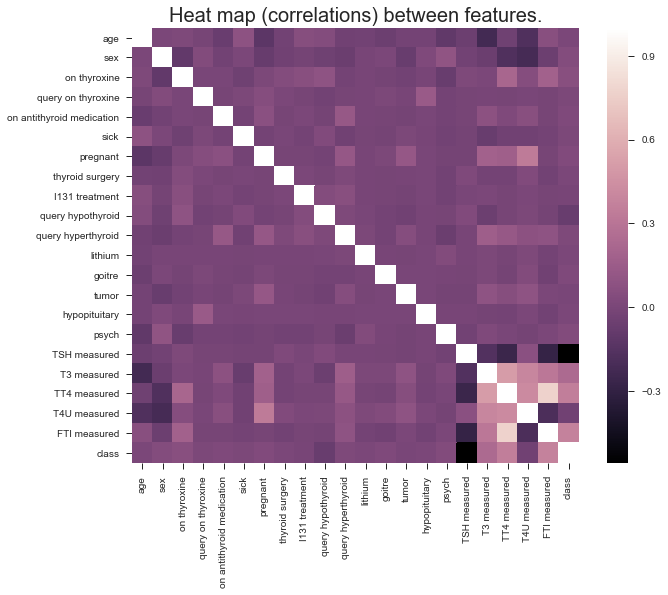

In [3]:
f, ax = plt.subplots(figsize=(10,8))
corr = train_df.corr()
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=False)
sns.heatmap(corr,cmap=cmap)
ax.set_title('Heat map (correlations) between features.', fontsize=20)

#### From the heap map we see different correlations for different measurements, let's explore the subset of the heatmap.

In [4]:
df_age = train_df[["age","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured", "class"]]
df_sex = train_df[["sex","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured", "class"]]
df_corr_age = df_age.corr()
df_corr_sex = df_sex.corr()

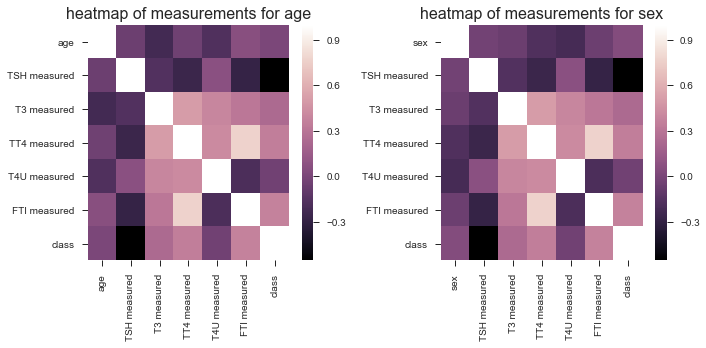

In [5]:
f, ax = plt.subplots( 1, 2, figsize=(10,5), sharex=False, sharey=False)
sns.heatmap(df_corr_age, ax=ax[0],cmap=cmap)
ax[0].set_title('heatmap of measurements for age', fontsize=16)
sns.heatmap(df_corr_sex, ax=ax[1],cmap=cmap)
ax[1].set_title('heatmap of measurements for sex', fontsize=16)
plt.tight_layout()

### Provide scatter plots for age, sex.

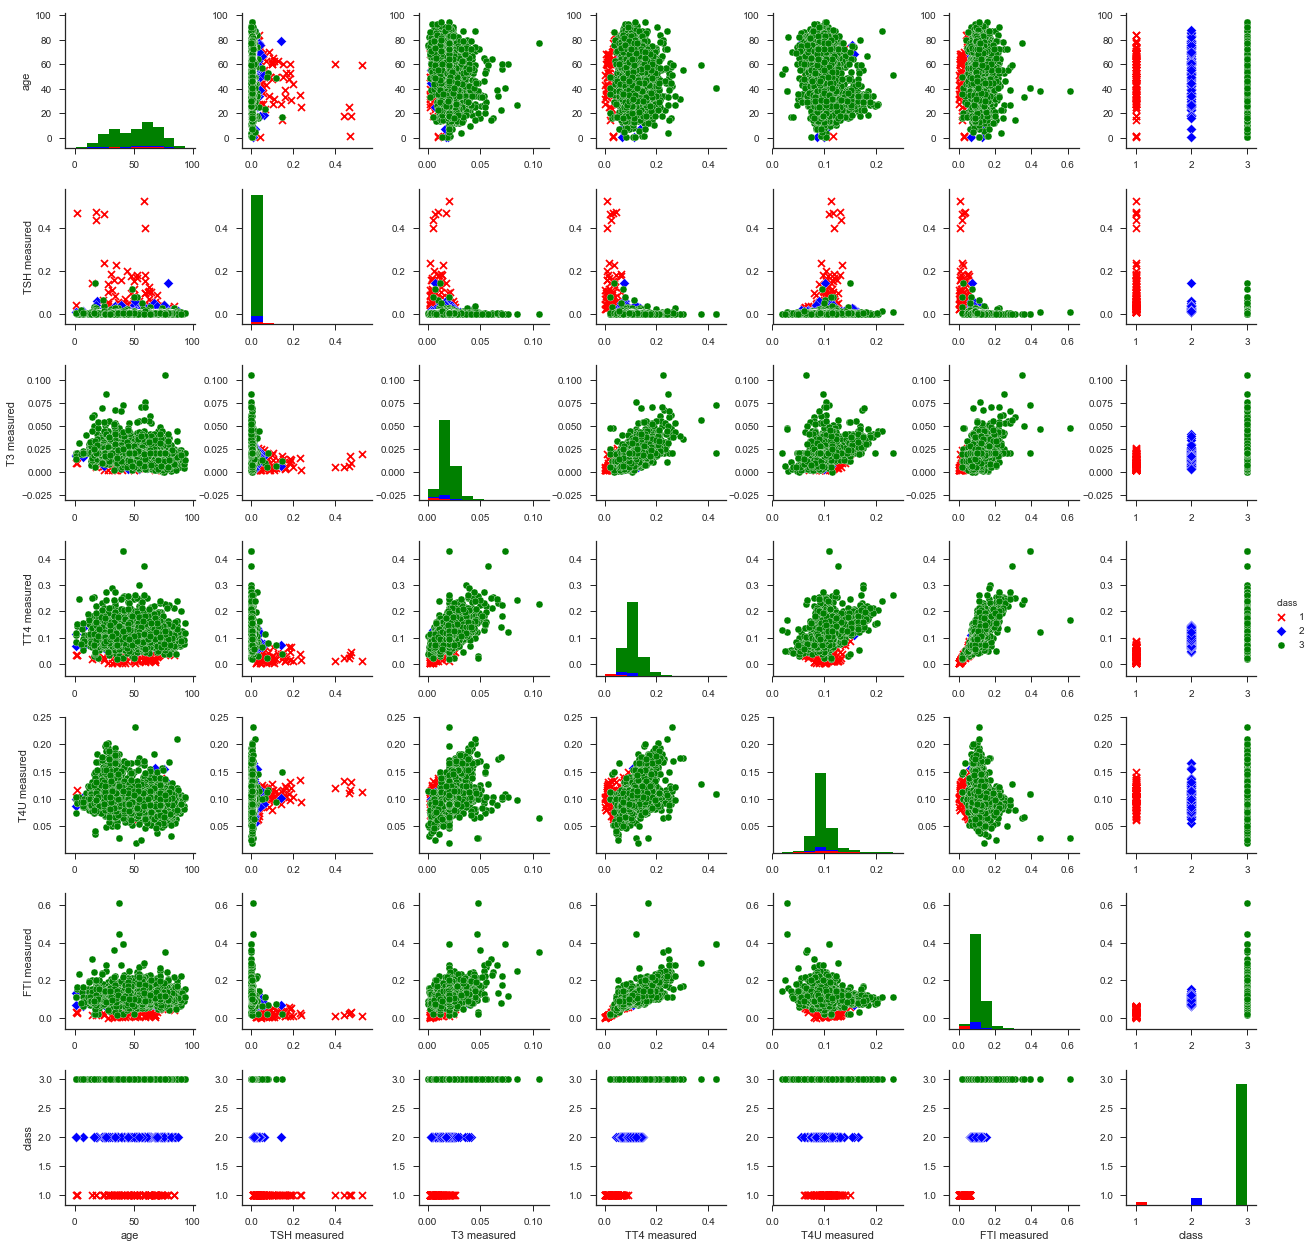

In [6]:
colorMap = {3:'green',2:'blue',1:'red'}
sns.pairplot(df_age, hue="class",  markers=["x", "D", "o"], palette=colorMap)
plt.show()

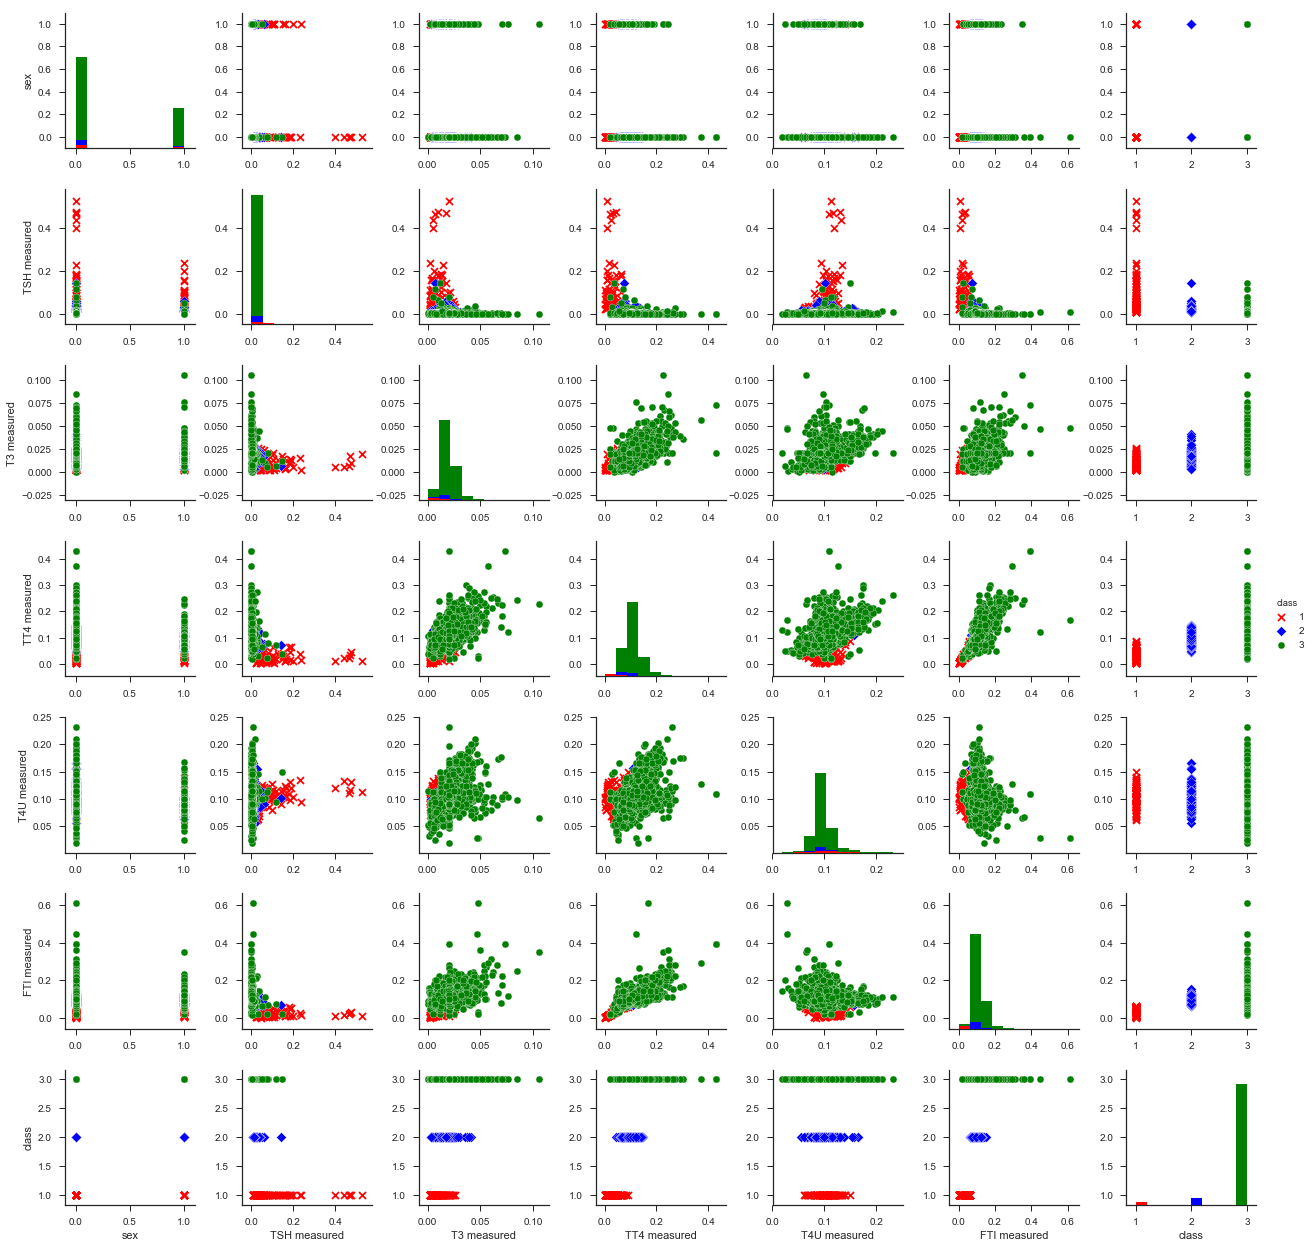

In [7]:
sns.pairplot(df_sex, hue="class",  markers=["x", "D", "o"], palette=colorMap)
plt.show()

#### Further let's see correlations for continous variables (visually).

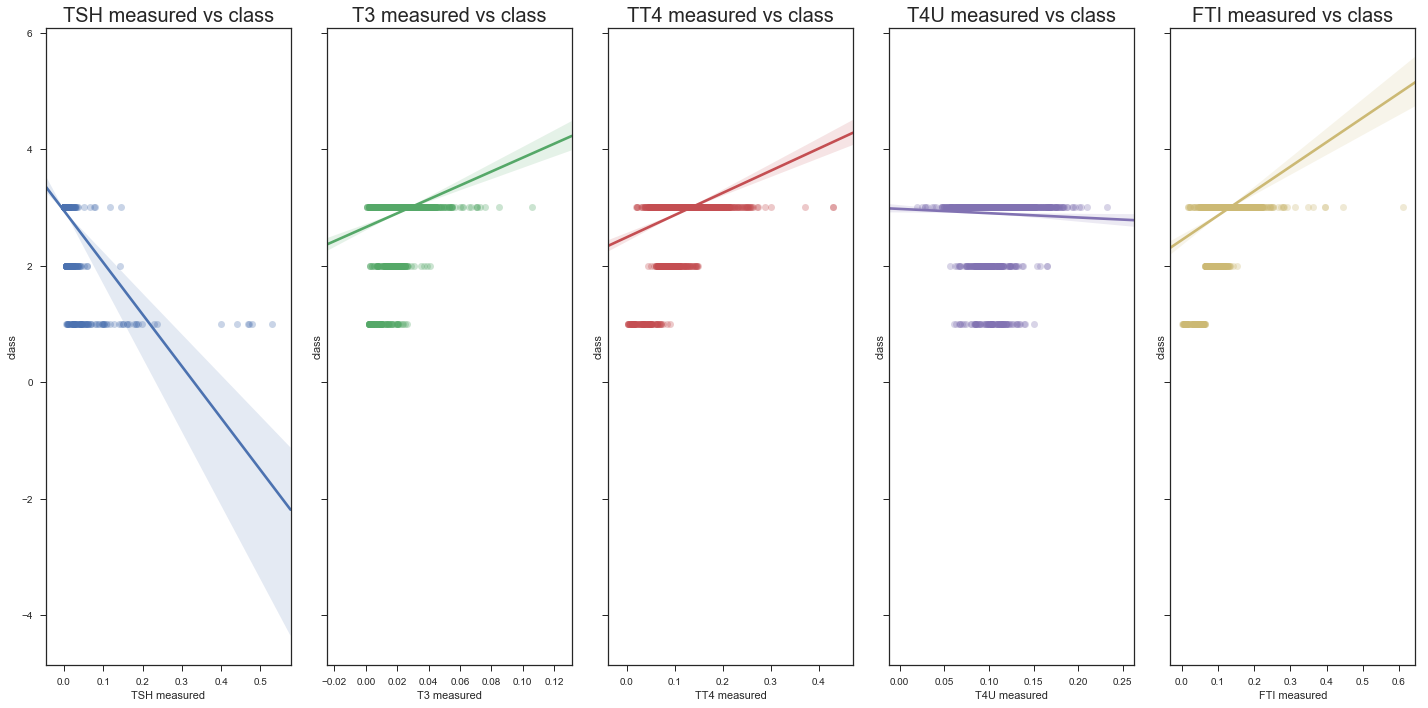

In [8]:
continuous_cols = ["TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured"]
f, ax = plt.subplots(1,len(continuous_cols),figsize=(20,10), sharex=False, sharey=True)
for i in range(len(continuous_cols)):
    sns.regplot(x=train_df[continuous_cols[i]], y=train_df['class'], fit_reg=True, ax=ax[i], scatter_kws={'alpha':0.3})
    ax[i].set_title(str(continuous_cols[i])+' vs class', fontsize=20)
plt.tight_layout()

### Now, we plot a heat map and scatter plots for remaining field.

Text(0.5,1,'Heat map between non-continous variables.')

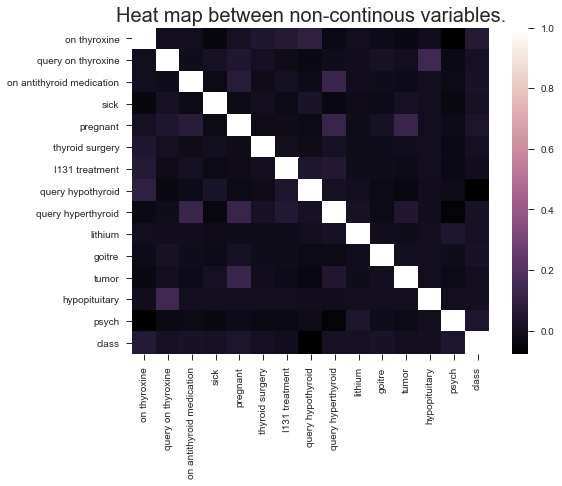

In [9]:
df = train_df[['on thyroxine', 'query on thyroxine', 'on antithyroid medication','sick','pregnant',
               'thyroid surgery','I131 treatment','query hypothyroid','query hyperthyroid','lithium', 
               'goitre','tumor','hypopituitary','psych','class']]
df_corr = df.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_corr, cmap=cmap)
ax.set_title('Heat map between non-continous variables.', fontsize=20)

### We see week correlations between non-continous variables and class.

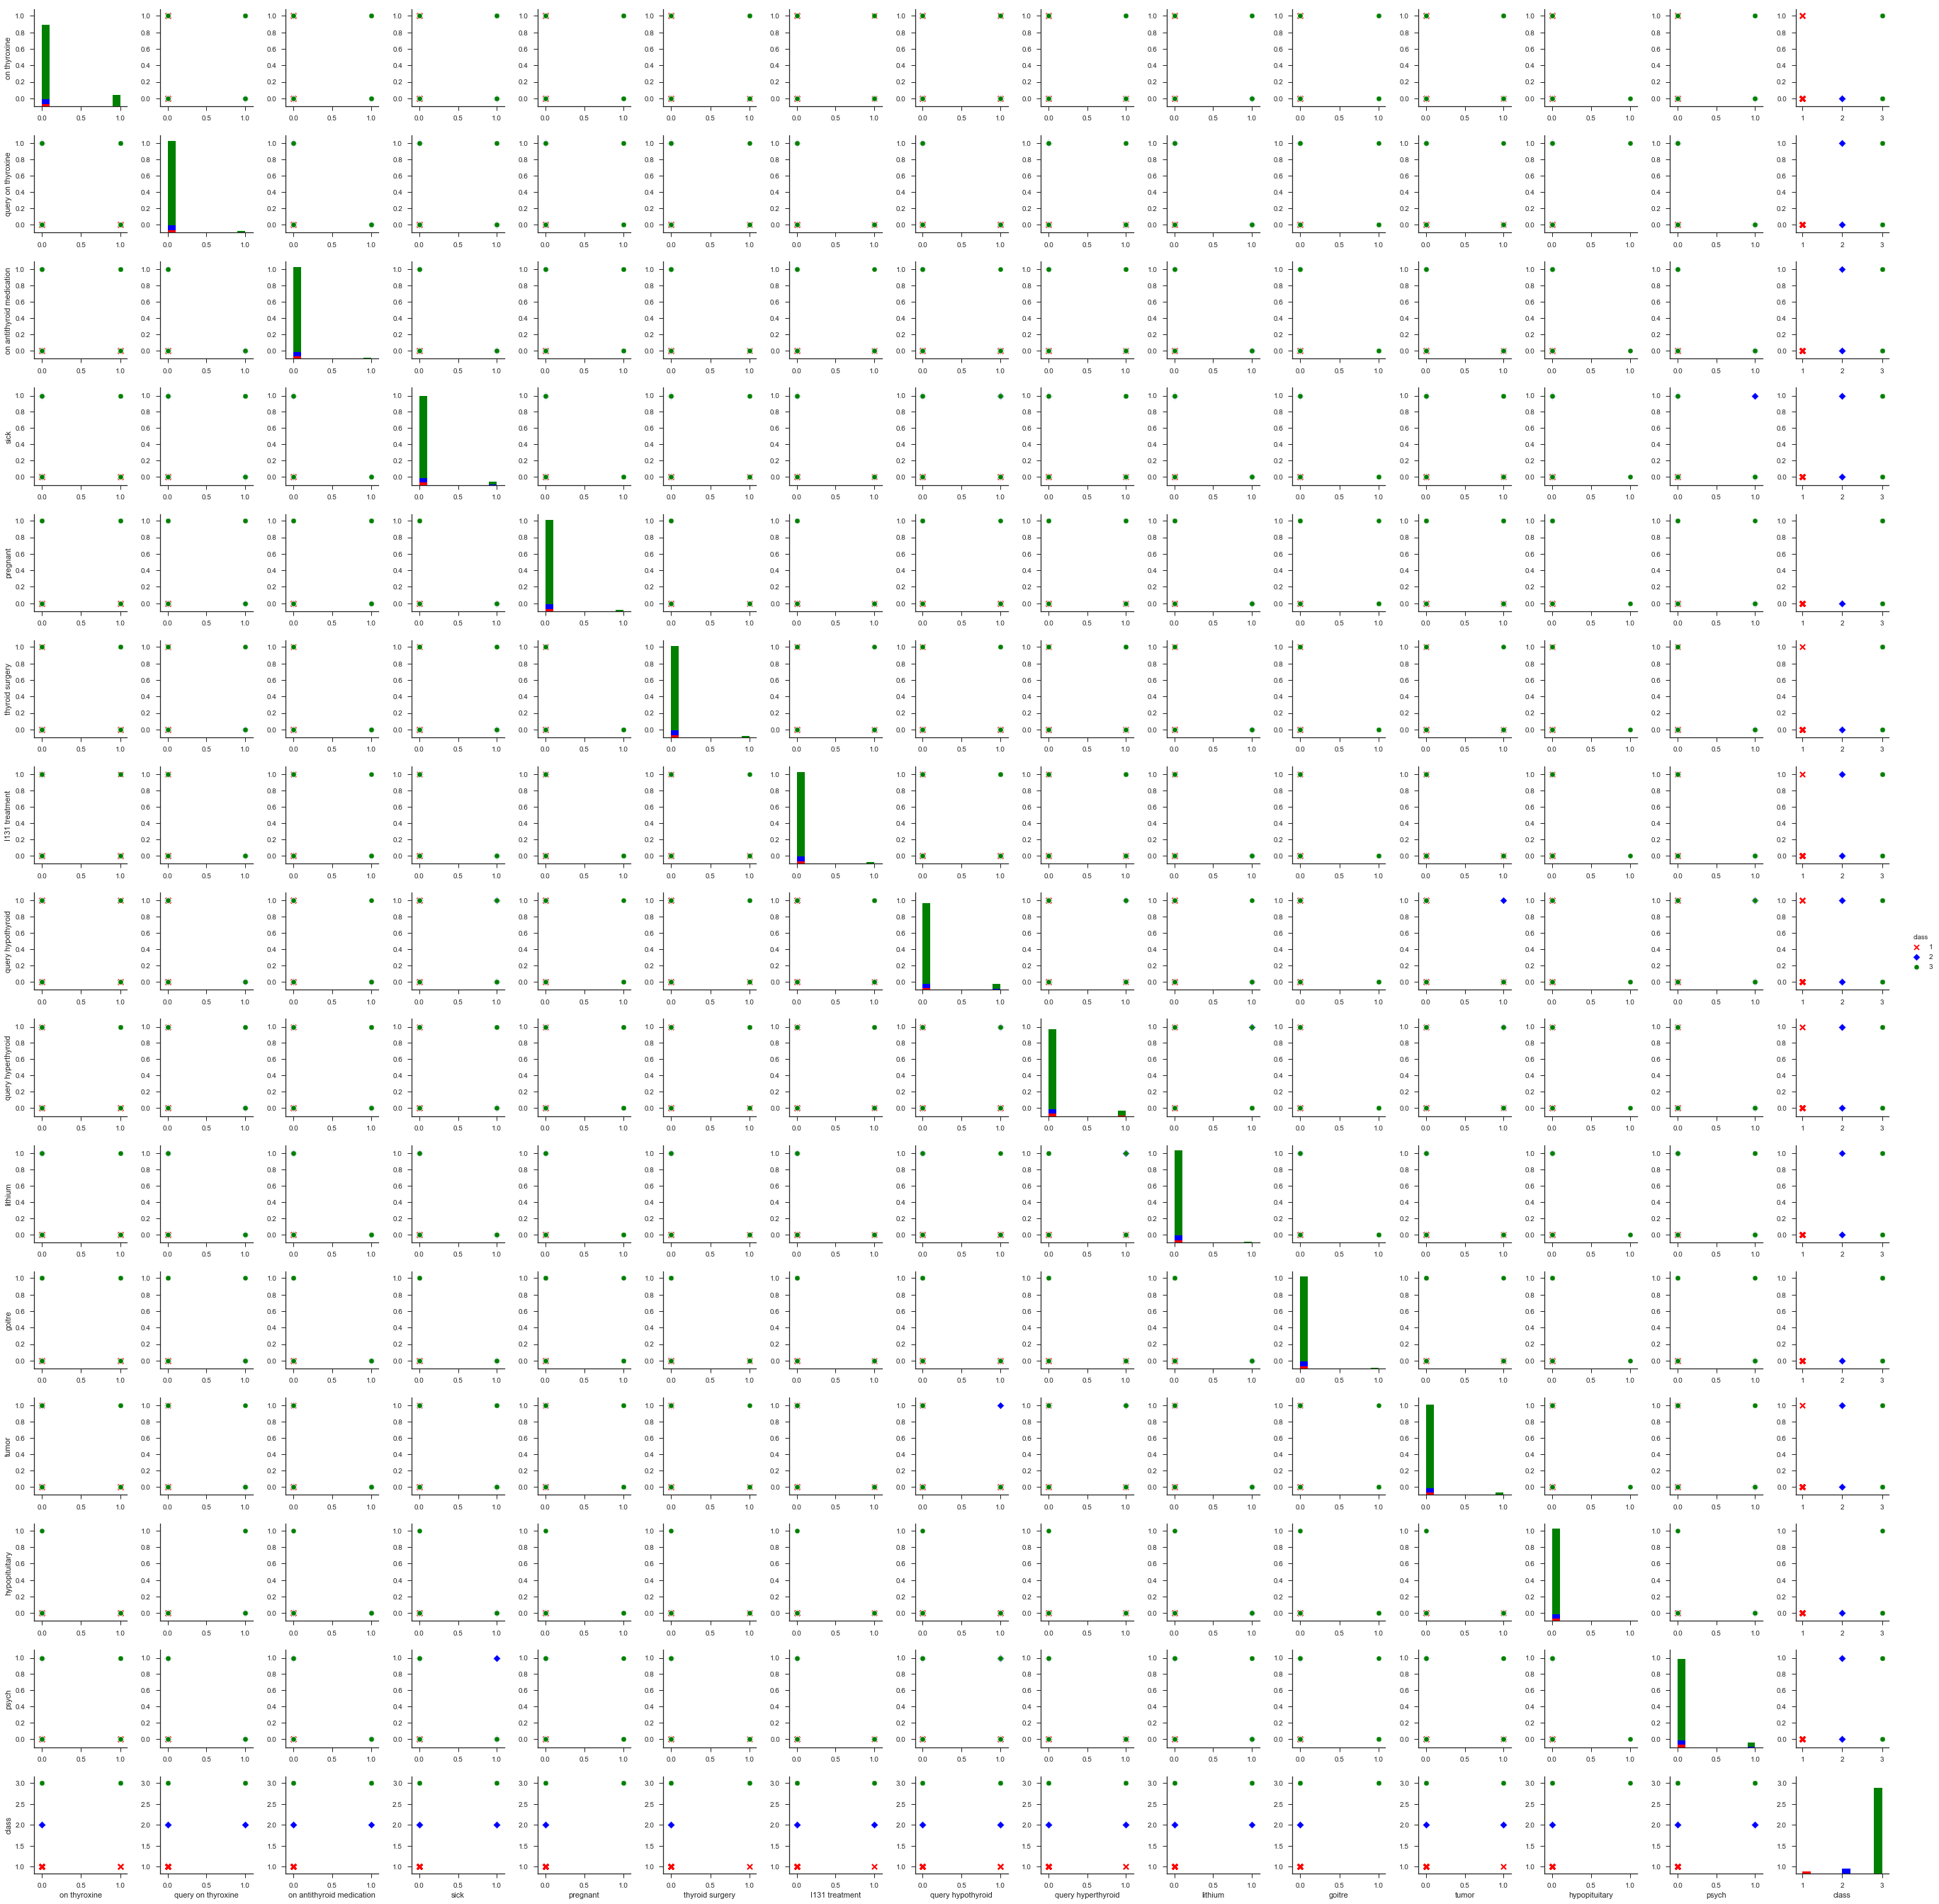

In [10]:
sns.pairplot(df, hue="class",  markers=["x", "D", "o"], palette=colorMap)
plt.show()

### From the above heat map and scatter plots for non-continous variables it was not very much helpful.

## Conclusion
There are many factors to be looked at and considered when finding relation for a class. From the analysis we cannot single handedly point out a major factor effecting the class, each feature is contributing to distingush between different class.

When predicting a class lot of variables are to be addressed, since there are very few data points for non-normal (i.e, hyperthyroid, hypothyroid) class.

## We conclude our exploratory data analysis.

# Inferential statistics.

### By looking at the TT4 measurements in story telling and heat maps, there seems a bit a positive correlation.
### Let's do some hypothesis testing around TT4 meaurements and class.

### We believe that there can be some statistical significance between mentioned variables.
Perform a hypothesis test.

H-zero = There is no relation between TT4 measurement and class.

H-alpha = There is relation between TT4 measurement and class.

In [11]:
def ecdf(data):
    """compute ecdf"""
    return np.sort(data), np.arange(1, len(data)+1)/len(data)

#### Let's check the distribution of TT4 measurements

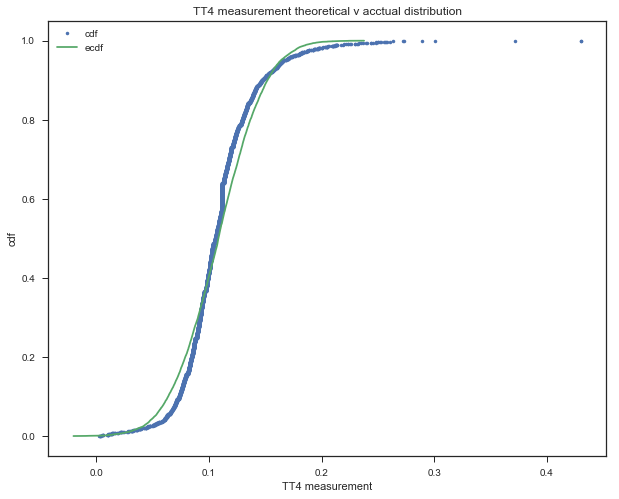

In [12]:
x_temp, y_temp = ecdf(train_df['TT4 measured'])
theoretical = np.random.normal(np.mean(train_df['TT4 measured']), np.std(train_df['TT4 measured']), size=10000)
x_theo_temp, y_theo_temp = ecdf(theoretical)
plt.figure(figsize=(10,8))
plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.plot(x_theo_temp,y_theo_temp)
plt.title('TT4 measurement theoretical v acctual distribution')
plt.ylabel('cdf')
plt.xlabel('TT4 measurement')
plt.legend(('cdf','ecdf'))
plt.show()

#### Visually not all points lie on the theoretical distribution.
#### Perform a normal test and check whether the distribution is normal or not.

In [13]:
# normal test
from scipy import stats
n_stat, n_pval = stats.normaltest(train_df['TT4 measured'])
is_normal = 'not normal' if (n_pval < 0.05) else 'normal'

print('TT4 measurements is',is_normal,'distribution, since p value is',n_pval)

TT4 measurements is not normal distribution, since p value is 1.12593170689e-259


### Now check the correlation between TT4 measurement and class.

In [14]:
tt4 = train_df['TT4 measured']
classtype = train_df['class']
corr_tt4 = tt4.corr(classtype)
print('correlation between TT4 measurement and class:',corr_tt4,'.')

correlation between TT4 measurement and class: 0.351214541506 .


#### We have a positive correlation.
### Perform different tests to check for significance.

In [15]:
# bootstraping
perm_reps = np.empty(10000)
for i in range(10000):
    perms = np.random.permutation(tt4)
    perm_reps[i] = np.corrcoef(perms,classtype)[0,1]
    #print(perm_reps[i])
p = np.sum(perm_reps >= corr_tt4)/10000
print('p value:',p)

p value: 0.0


In [16]:
# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(tt4,classtype)
print(slope, intercept, r_value, p_value, std_err)
print('\np value',p_value,'is very low.')

3.80095116532 2.48846239003 0.351214541506 6.21249351517e-110 0.165029595292

p value 6.21249351517e-110 is very low.


### From the above tests, we see the p value is close to zero (or very low) and we can reject the null hypothesis.

### Look into the confidence levels and see if person suffereing from hyperthyroid (class 1) lies in the interval (say 95%)

In [17]:
predictive_ci = stats.norm.interval(0.95, loc=tt4.mean(), scale=tt4.std())
predictive_ci

(0.040691621857434551, 0.17588081716695528)

In [18]:
classtype_1 = train_df[train_df['class']==1]
#classtype_1.describe()

In [19]:
classtype_1_mean = classtype_1['TT4 measured'].mean()
does_lies = 'does' if (predictive_ci[0] < classtype_1_mean < predictive_ci[1]) else 'does not'
print('Class type 1 (hyperthyroid)',does_lies,'lie inside the regualar TT4 measurements.')

Class type 1 (hyperthyroid) does not lie inside the regualar TT4 measurements.


### We can say statistically class type of 1 (hyperthyroid) lies outside the measured TT4 confidence interval values.